# K-Nearest Neighbors

## 1. Introducción a K-Nearest Neighbors (KNN)
El algoritmo K-Nearest Neighbors (KNN) es un método de clasificación y regresión utilizado en machine learning. Es uno de los algoritmos más simples y efectivos, especialmente para problemas de clasificación.

### Concepto Básico:
El algoritmo KNN clasifica un punto de datos basándose en la mayoría de sus vecinos más cercanos en el espacio de características. El número "K" representa cuántos vecinos consideramos para tomar una decisión.

### Ejemplo:
Si tenemos un conjunto de puntos en un gráfico bidimensional, y cada punto está etiquetado como perteneciente a una clase A o B. Para clasificar un nuevo punto, el algoritmo busca los "K" puntos más cercanos (en términos de distancia) y asigna al nuevo punto la clase mayoritaria de esos vecinos.

## 2. La Ecuación del Algoritmo KNN
La distancia más comúnmente utilizada en KNN es la distancia Euclidiana, que se calcula usando la siguiente ecuación:

$$ d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2}$$

​
 
Donde:

- $𝑥$ =  es el punto de datos que quieres clasificar.
- $𝑥_𝑖$ =  es un punto de datos en el conjunto de entrenamiento.
- $𝑥_𝑗$ y $𝑥_𝑖$ son los valores de las características para los puntos 
- $𝑛$ es el número de características.

El algoritmo busca los "K" puntos de datos con las distancias más pequeñas a 𝑥 y luego realiza una "votación" mayoritaria para decidir la clase a la que pertenece 𝑥.

### Ventajas:

- Fácil de entender e implementar.
- No necesita entrenamiento explícito (es un algoritmo "lazy").

### Desventajas:

- Puede ser computacionalmente costoso, especialmente con grandes conjuntos de datos.
- Sensible a la escala de los datos, por lo que la normalización es esencial.

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier    # simplemente importo el modelo, KNN-Classifier. Lo demás es igual, fit y predict
from sklearn.metrics import classification_report, confusion_matrix

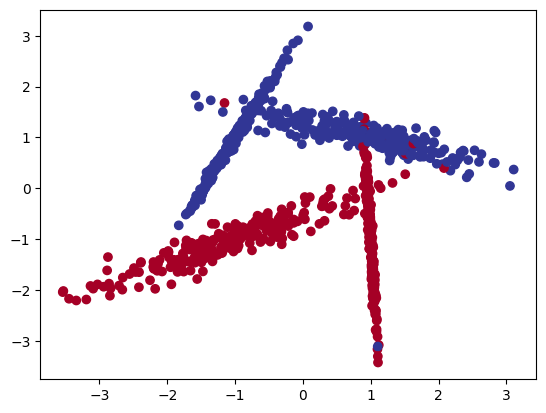

In [2]:
# Crear un Dataset de Ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=73)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [3]:
# Dividir los Datos en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)

In [4]:
# Normalización de los Datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Entrenar el Modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Evaluar el Modelo
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137   5]
 [  0 158]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.97      1.00      0.98       158

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



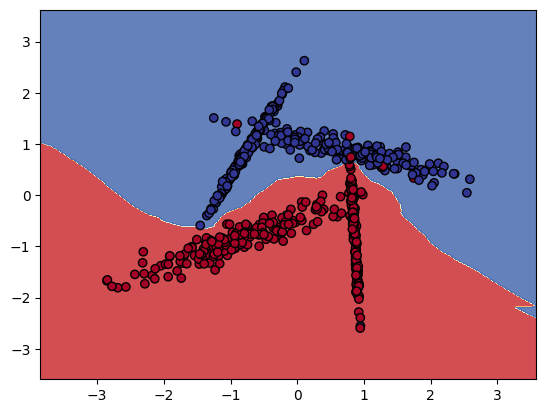

In [7]:
# Visualizar la Frontera de Decisión
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.RdYlBu)
    plt.show()

plot_decision_boundary(knn, X_train, y_train)

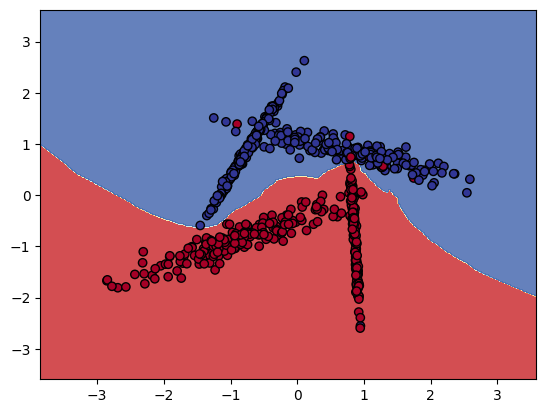

In [8]:
# Ajuste de Parámetros (Opcional)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_decision_boundary(knn, X_train, y_train)